재배 면적
[[ 2.1]
 [10. ]
 [ 3. ]
 [ 1. ]
 [ 3.5]
 [ 5. ]
 [ 8. ]]
수확량 : [ 64.9  292.6   85.9   30.92 110.5  163.4  230.1 ]


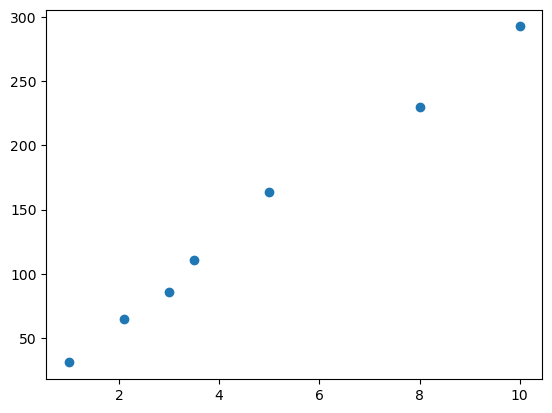

In [8]:
# 데이터 전처리
# 데이터 준비
import numpy as np
x = np.array( [[2.1], [10], [3], [1], [3.5], [5], [8]] , dtype=float)
y = np.array( [64.9, 292.6, 85.9, 30.92, 110.5, 163.4, 230.1] , dtype=float) 

print("재배 면적")
print(x)
print("수확량 :" ,y)
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(x,y)

LinearRegression()

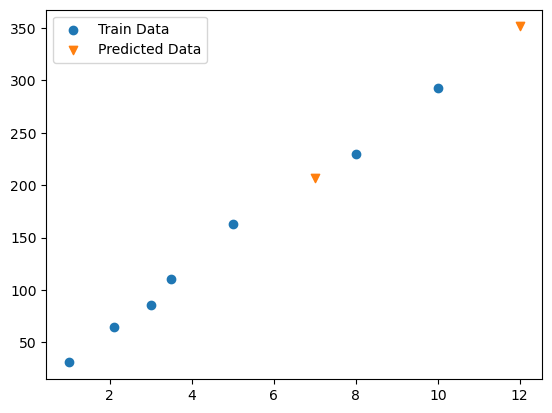

In [16]:
prd = LR_model.predict([[7], [12]])
prd
plt.scatter(x,y, label='Train Data')
plt.scatter([7,12], prd, marker='v', label='Predicted Data')

plt.legend()
plt.show()

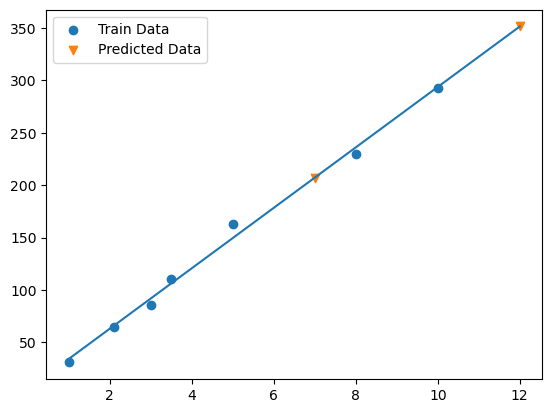

In [18]:
line_x = np.array([1,12])
line_y = line_x*LR_model.coef_+LR_model.intercept_
plt.plot(line_x, line_y)

plt.scatter(x,y, label='Train Data')
plt.scatter([7,12], prd, marker='v', label='Predicted Data')
plt.legend()
plt.show()

In [19]:
#데이터 저장
import pandas as pd
import numpy as np

df = pd.read_csv('Student_Marks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [20]:
#상관도 출력
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


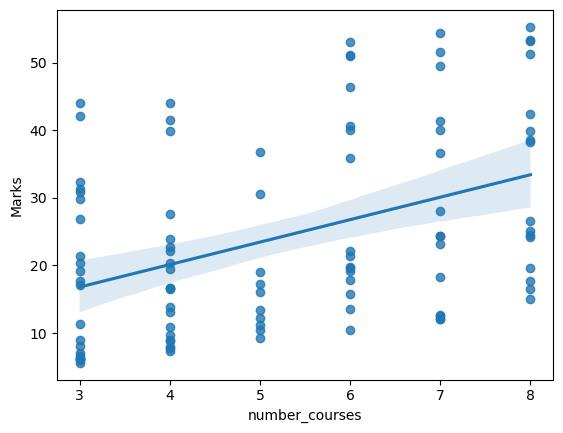

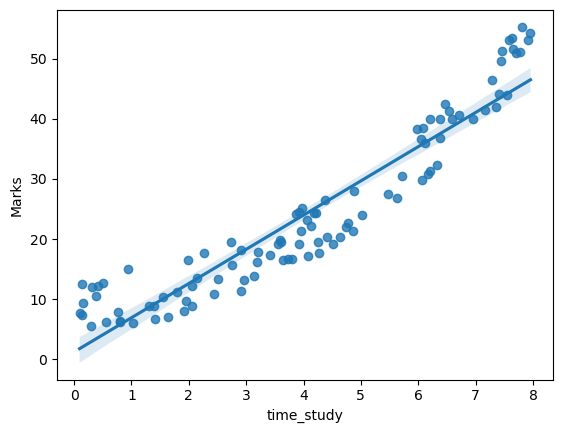

In [21]:
#그래프로 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='number_courses', y='Marks', data=df)
plt.show()

sns.regplot(x='time_study', y='Marks', data=df)
plt.show()

In [22]:
#학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['Marks']

x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [23]:
#머신 러닝 학습
from sklearn.neighbors import KNeighborsRegressor

KN_model = KNeighborsRegressor()
KN_model.fit(x_train, y_train)

KNeighborsRegressor()

In [24]:
#예측하기
KN_prd = KN_model.predict(x_test)
pd.DataFrame({'예측값':KN_prd,'실제값':y_test,'예측-실제':KN_prd-y_test})

,예측값,실제값,예측-실제
26,12.4620,12.647,-0.1850
86,24.8144,23.149,1.6654
2,14.6756,13.811,0.8646
55,18.1174,18.238,-0.1206
75,6.1638,6.217,-0.0532
93,41.8852,42.426,-0.5408
16,32.7114,30.548,2.1634
73,7.2098,7.014,0.1958
54,53.1810,53.158,0.0230
95,20.1534,19.128,1.0254


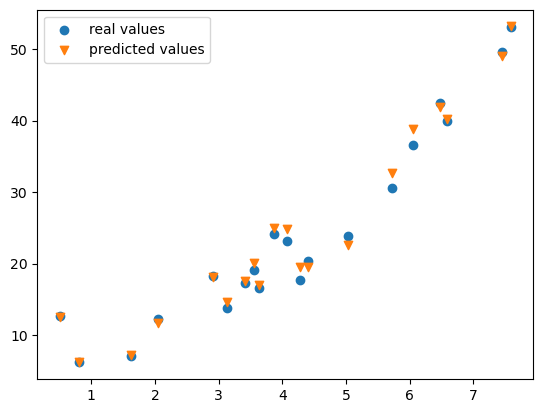

In [25]:
# 산점도 그래프로 살펴보기
plt.scatter(x_test['time_study'],y_test,label='real values')
plt.scatter(x_test['time_study'],KN_prd,label='predicted values',marker='v')
plt.legend()
plt.show()

In [26]:
#평가하기
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, KN_prd)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, KN_prd)
score = KN_model.score(x_test, y_test)

print('mse =',mse)
print('rmse =', rmse)
print('r2 score =',r2)   
print('score =',score)

mse = 1.084407673999999
rmse = 1.041348968405884
r2 score = 0.9937819644602224
score = 0.9937819644602224


In [27]:
#선형 회귀 모델 생성, 학습, 예측, 평가
from sklearn.linear_model import LinearRegression

LN_model=LinearRegression()
LN_model.fit(x_train, y_train)
LN_prd = LN_model.predict(x_test)

mse = mean_squared_error(y_test, LN_prd)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, LN_prd)
score = LN_model.score(x_test, y_test)

print('mse =',mse)
print('rmse =', rmse)
print('r2 score =',r2)   
print('score =',score)

mse = 10.823984498942066
rmse = 3.289982446600903
r2 score = 0.9379348542894724
score = 0.9379348542894724
